In [1]:
library(forecast)
library(tseries)
library(ggplot2)

# H2O Deep Learning

In [6]:
library(h2o)
library(timetk)
library(tidyquant)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc

Loading required package: lubridate

Attaching package: ‘lubridate’

The following objects are masked from ‘package:h2o’:

    day, hour, month, week, year

The following object is masked from ‘package:base’:

    date

Loading required package: PerformanceAnalytics
Loading required package: xts
Loa

In [81]:
datadt <- data.frame(Date=datad$Date,Close=datad$Close)#Close=random_stl_long[1:1601])

In [82]:
str(datadt)

'data.frame':	1601 obs. of  2 variables:
 $ Date : Date, format: "2012-01-02" "2012-01-03" ...
 $ Close: num  3222 3245 3194 3145 3137 ...


In [83]:
head(datadt)

Date,Close
2012-01-02,3222.30
2012-01-03,3245.40
2012-01-04,3193.65
2012-01-05,3144.91
2012-01-06,3137.36
2012-01-09,3127.69


In [84]:
datadt_augment <- datadt %>%
  tk_augment_timeseries_signature()
head(datadt_augment)

Date,Close,index.num,diff,year,year.iso,half,quarter,month,month.xts,...,mday,qday,yday,mweek,week,week.iso,week2,week3,week4,mday7
2012-01-02,3222.30,1325462400,NA,2012,2012,1,1,1,0,...,2,2,2,1,1,1,1,1,1,1
2012-01-03,3245.40,1325548800,86400,2012,2012,1,1,1,0,...,3,3,3,1,1,1,1,1,1,1
2012-01-04,3193.65,1325635200,86400,2012,2012,1,1,1,0,...,4,4,4,1,1,1,1,1,1,1
2012-01-05,3144.91,1325721600,86400,2012,2012,1,1,1,0,...,5,5,5,1,1,1,1,1,1,1
2012-01-06,3137.36,1325808000,86400,2012,2012,1,1,1,0,...,6,6,6,1,1,1,1,1,1,1
2012-01-09,3127.69,1326067200,259200,2012,2012,1,1,1,0,...,9,9,9,2,2,2,0,2,2,2


In [85]:
datadt_augment_clean <- datadt_augment %>%
  select_if(~ !is.Date(.)) %>%
  select_if(~ !any(is.na(.))) %>%
  mutate_if(is.ordered, ~ as.character(.) %>% as.factor)
head(datadt_augment_clean,10)

Close,index.num,year,year.iso,half,quarter,month,month.xts,month.lbl,day,...,mday,qday,yday,mweek,week,week.iso,week2,week3,week4,mday7
3222.30,1325462400,2012,2012,1,1,1,0,January,2,...,2,2,2,1,1,1,1,1,1,1
3245.40,1325548800,2012,2012,1,1,1,0,January,3,...,3,3,3,1,1,1,1,1,1,1
3193.65,1325635200,2012,2012,1,1,1,0,January,4,...,4,4,4,1,1,1,1,1,1,1
3144.91,1325721600,2012,2012,1,1,1,0,January,5,...,5,5,5,1,1,1,1,1,1,1
3137.36,1325808000,2012,2012,1,1,1,0,January,6,...,6,6,6,1,1,1,1,1,1,1
3127.69,1326067200,2012,2012,1,1,1,0,January,9,...,9,9,9,2,2,2,0,2,2,2
3210.79,1326153600,2012,2012,1,1,1,0,January,10,...,10,10,10,2,2,2,0,2,2,2
3204.83,1326240000,2012,2012,1,1,1,0,January,11,...,11,11,11,2,2,2,0,2,2,2
3199.98,1326326400,2012,2012,1,1,1,0,January,12,...,12,12,12,2,2,2,0,2,2,2
3196.49,1326412800,2012,2012,1,1,1,0,January,13,...,13,13,13,2,2,2,0,2,2,2


In [86]:
train_tbl <- datadt_augment_clean %>% filter(year <= 2016)
valid_tbl <- datadt_augment_clean %>% filter(year >= 2015 & year<2017)
test_tbl  <- datadt_augment_clean %>% filter(year > 2016)

In [66]:
head(test_tbl,10)

Close,index.num,year,year.iso,half,quarter,month,month.xts,month.lbl,day,...,mday,qday,yday,mweek,week,week.iso,week2,week3,week4,mday7
0.02410056,1483315200,2017,2017,1,1,1,0,January,2,...,2,2,2,1,1,1,1,1,1,1
0.03694495,1483401600,2017,2017,1,1,1,0,January,3,...,3,3,3,1,1,1,1,1,1,1
0.03290240,1483488000,2017,2017,1,1,1,0,January,4,...,4,4,4,1,1,1,1,1,1,1
0.03507169,1483574400,2017,2017,1,1,1,0,January,5,...,5,5,5,1,1,1,1,1,1,1
0.02824407,1483660800,2017,2017,1,1,1,0,January,6,...,6,6,6,1,1,1,1,1,1,1
0.02505121,1483920000,2017,2017,1,1,1,0,January,9,...,9,9,9,2,2,2,0,2,2,2
0.02655583,1484006400,2017,2017,1,1,1,0,January,10,...,10,10,10,2,2,2,0,2,2,2
0.02692294,1484092800,2017,2017,1,1,1,0,January,11,...,11,11,11,2,2,2,0,2,2,2
0.02854483,1484179200,2017,2017,1,1,1,0,January,12,...,12,12,12,2,2,2,0,2,2,2
0.03562650,1484265600,2017,2017,1,1,1,0,January,13,...,13,13,13,2,2,2,0,2,2,2


In [112]:
(train_tbl)

Close,index.num,year,year.iso,half,quarter,month,month.xts,month.lbl,day,...,mday,qday,yday,mweek,week,week.iso,week2,week3,week4,mday7
3222.30,1325462400,2012,2012,1,1,1,0,January,2,...,2,2,2,1,1,1,1,1,1,1
3245.40,1325548800,2012,2012,1,1,1,0,January,3,...,3,3,3,1,1,1,1,1,1,1
3193.65,1325635200,2012,2012,1,1,1,0,January,4,...,4,4,4,1,1,1,1,1,1,1
3144.91,1325721600,2012,2012,1,1,1,0,January,5,...,5,5,5,1,1,1,1,1,1,1
3137.36,1325808000,2012,2012,1,1,1,0,January,6,...,6,6,6,1,1,1,1,1,1,1
3127.69,1326067200,2012,2012,1,1,1,0,January,9,...,9,9,9,2,2,2,0,2,2,2
3210.79,1326153600,2012,2012,1,1,1,0,January,10,...,10,10,10,2,2,2,0,2,2,2
3204.83,1326240000,2012,2012,1,1,1,0,January,11,...,11,11,11,2,2,2,0,2,2,2
3199.98,1326326400,2012,2012,1,1,1,0,January,12,...,12,12,12,2,2,2,0,2,2,2
3196.49,1326412800,2012,2012,1,1,1,0,January,13,...,13,13,13,2,2,2,0,2,2,2


In [88]:
h2o.init()
#(nthreads = -1, max_mem_size = '4g', ip = "127.0.0.1") 
# remember to install JKD 8 http://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 hours 45 minutes 
    H2O cluster timezone:       Asia/Ho_Chi_Minh 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.18.0.11 
    H2O cluster version age:    10 days  
    H2O cluster name:           H2O_started_from_R_longng_pom973 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   2.73 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.5.0 (2018-04-23) 



In [89]:
train_h2o <- as.h2o(train_tbl)

  |======================================================================| 100%


In [90]:
valid_h2o <- as.h2o(valid_tbl)

  |======================================================================| 100%


In [91]:
test_h2o  <- as.h2o(test_tbl)

  |======================================================================| 100%


In [92]:
# Set names for h2o: 
y <- "Close"
x <- setdiff(names(train_h2o), y)

In [93]:
automl_models_h2o <- h2o.automl(
  x = x, 
  y = y, 
  training_frame = train_h2o, 
  leaderboard_frame = test_h2o, 
  max_runtime_secs = 60, 
  stopping_metric = "deviance")

  |======================================================================| 100%
  |======================================================================| 100%


In [100]:
# Extract leader model: 
automl_leader <- automl_models_h2o@leader
summary(automl_leader)

Model Details:

H2ORegressionModel: glm
Model Key:  GLM_grid_0_AutoML_20180603_161234_model_0 
GLM Model: summary
    family     link             regularization
1 gaussian identity Ridge ( lambda = 0.06903 )
                                                                  lambda_search
1 nlambda = 30, lambda.max = 42871.0, lambda.min = 0.06903, lambda.1se = 0.1112
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                         37                          37                   30
             training_frame
1 automl_training_train_tbl

H2ORegressionMetrics: glm
** Reported on training data. **

MSE:  94847.42
RMSE:  307.9731
MAE:  256.1829
RMSLE:  0.07266761
Mean Residual Deviance :  94847.42
R^2 :  0.663847
Null Deviance :289209412
Null D.o.F. :1024
Residual Deviance :97218601
Residual D.o.F. :987
AIC :14733.35


H2ORegressionMetrics: glm
** Reported on validation data. **

MSE:  108040.1
RMSE:  328.6945
MAE:  271.7903
RMSLE:  0.07592706
Mean Res

In [101]:
h2o.performance(automl_leader, newdata = test_h2o)

H2ORegressionMetrics: glm

MSE:  34978.95
RMSE:  187.0266
MAE:  157.5389
RMSLE:  0.0357872
Mean Residual Deviance :  34978.95
R^2 :  0.03794186
Null Deviance :356409046
Null D.o.F. :324
Residual Deviance :11368157
Residual D.o.F. :287
AIC :4400.623


In [102]:
# Investigate test error: 
pred_h2o <- h2o.predict(automl_leader, newdata = test_h2o)

  |======================================================================| 100%


In [111]:
pred_h2o

   predict
1 4897.730
2 4890.304
3 4898.896
4 4906.389
5 4912.011
6 4902.059

[325 rows x 1 column] 

In [103]:
error_tbl <- datadt %>% 
  filter(lubridate::year(Date) >= 2017) %>%
  add_column(pred = pred_h2o %>% as.tibble() %>% pull(predict)) %>%
  rename(actual = Close) %>%
  mutate(
    error     = actual - pred,
    error_pct = error / actual
  ) 

head(error_tbl)

Date,actual,pred,error,error_pct
2017-01-02,4882.38,4897.730,-15.3496400,-0.0031438848
2017-01-03,4899.33,4890.304,9.0261262,0.0018423184
2017-01-04,4899.40,4898.896,0.5039687,0.0001028634
2017-01-05,4900.64,4906.389,-5.7485903,-0.0011730285
2017-01-06,4909.84,4912.011,-2.1711425,-0.0004422023
2017-01-09,4887.57,4902.059,-14.4889676,-0.0029644523


In [104]:
error_tbl %>%
  summarise(
    me   = mean(error),
    rmse = mean(error^2)^0.5,
    mae  = mean(abs(error)),
    mape = mean(abs(error_pct)),
    mpe  = mean(error_pct)
  ) %>%
  glimpse()

Observations: 1
Variables: 5
$ me   <dbl> 94.69305
$ rmse <dbl> 187.0266
$ mae  <dbl> 157.5389
$ mape <dbl> 0.02983843
$ mpe  <dbl> 0.01728986


In [105]:
library(extrafont) # More fonts!! We'll use Chiller
loadfonts(device="postscript") 

In [114]:
summarise(error_tbl)

<0 x 0 matrix>

$x
[1] "Date"

$y
[1] "Price"

$title
[1] "CAC Forecast by Using Deep Learning (R h2o package)"

$caption
[1] "Data Source: Yahoo Finance"

attr(,"class")
[1] "labels"

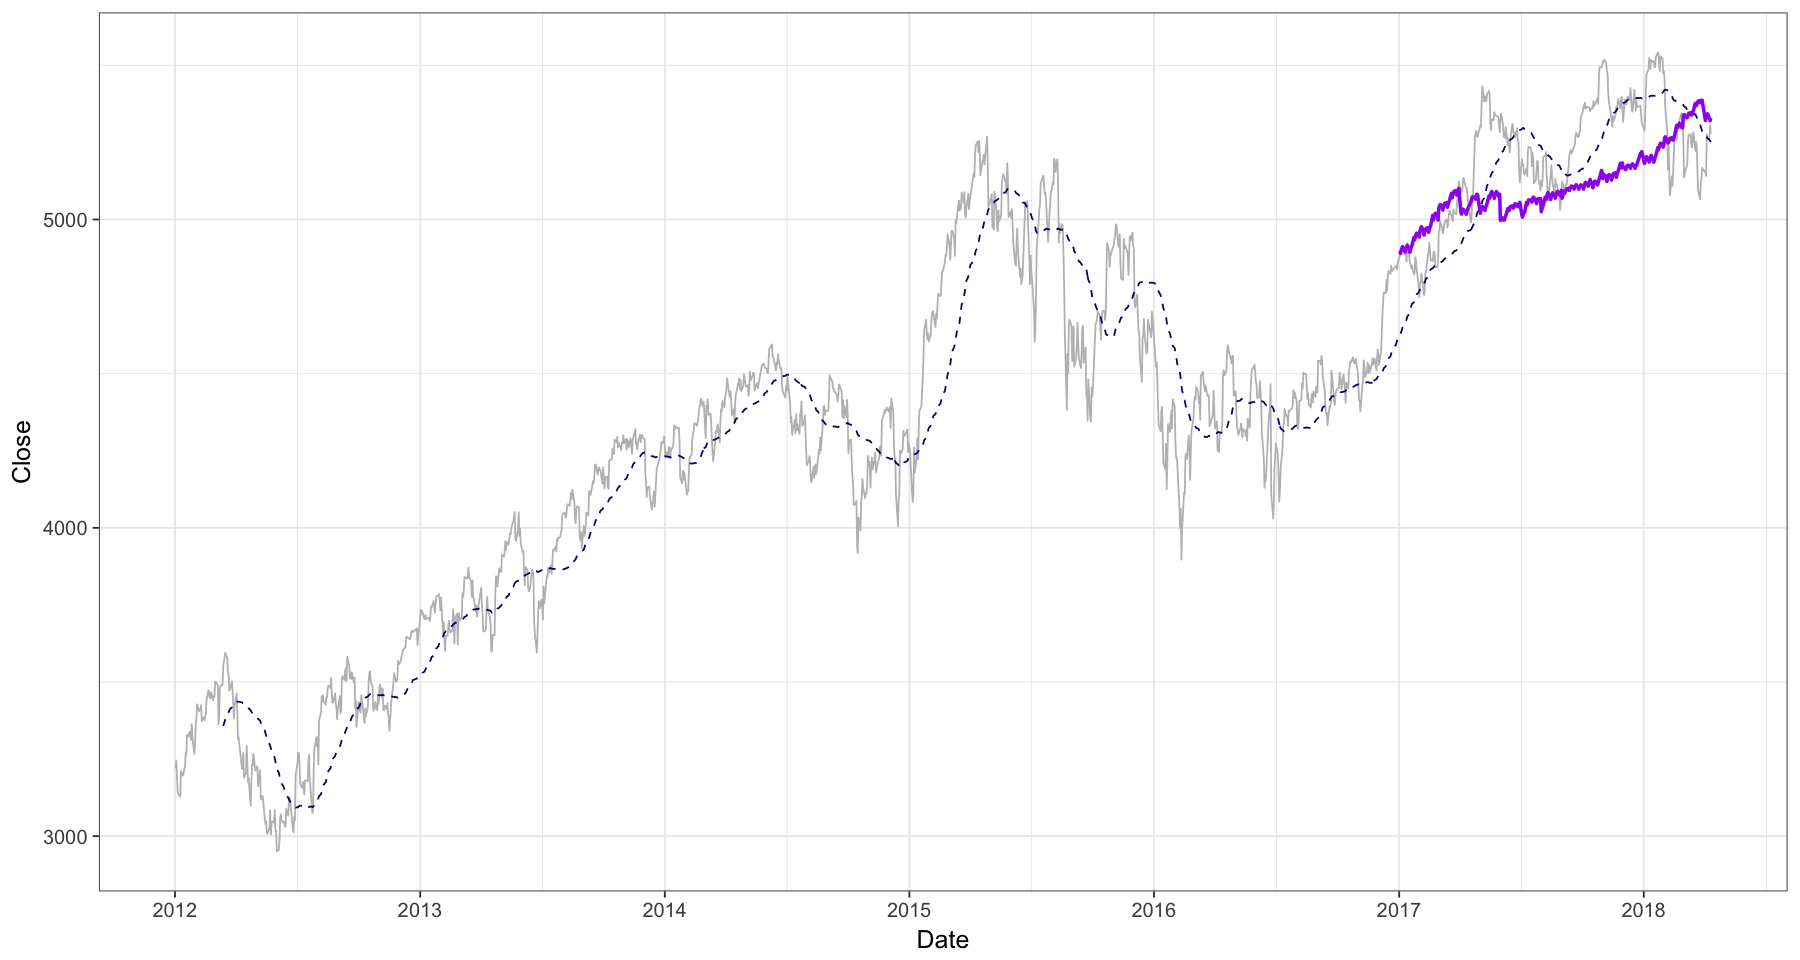

In [120]:
options(repr.plot.width = 15, repr.plot.height = 8)
datadt %>%
  ggplot(aes(x = Date, y = Close)) +
  geom_line(color = "gray", size = 0.5) +
  geom_ma(n = 52, color = "navy") +
  # Predictions - Spooky Purple
  geom_line(aes(y = pred), color = "purple", size = 1, data = error_tbl,lty=1) +
  theme_bw(base_size = 15) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  guides(colour=guide_legend(title="Forecast"))
  labs(
    x = "Date", y = "Price", 
    title = "CAC Forecast by Using Deep Learning (R h2o package)",
    caption = "Data Source: Yahoo Finance"
  )

In [107]:
MAPE<-function(actual,predict){
  mape=mean(abs((actual-predict)/actual))
  return(mape)
}

In [108]:
RMSE<-function(actual,predict){
  rmse=sqrt(mean((actual-predict)^2))
  return(rmse)
}

In [115]:
postscript("Fig23.eps", width = 9, height = 4,horizontal=FALSE)
datadt %>%
  ggplot(aes(x = Date, y = Close)) +
  geom_line(color = "gray", size = 0.5) +
  geom_ma(n = 52, color = "navy") +
  # Predictions - Spooky Purple
  geom_line(aes(y = pred), color = "purple", size = 1, data = error_tbl,lty=1) +
  theme_bw(base_size = 15) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  labs(
    x = "Date", y = "Price", 
    title = "CAC Forecast by Using Deep Learning (R h2o package)",
    caption = "Data Source: Yahoo Finance"
  )
dev.off()

pdf 
  2